
We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. Keep in mind that this project is mainly just to practice your skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here!


** Import libraries

In [1]:
import yfinance as yfin
import pandas as pd
import matplotlib as plt
import datetime
%matplotlib inline

So Tesla recently had a stock split.  This means that the historical data has been adjusted backwards to reflect this.  So to really get a good picture, I am reversing the stock split in a CSV.  So we will import Tesla from a CSV and the others from Yfinance.  



In [2]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [3]:
tesla = pd.read_csv('Tesla_Stock.csv',index_col='Date',parse_dates=True)

In [4]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951




** Now we use YFinance**

In [5]:
ford = yfin.download('F', start=start,end=end)
gm = yfin.download('GM',start=start,end=end)
ford.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,7.836860,45709900
2012-01-04,11.15,11.53,11.07,11.30,7.956559,79725200
2012-01-05,11.33,11.63,11.24,11.59,8.160754,67877500
2012-01-06,11.74,11.80,11.52,11.71,8.245250,59840700
2012-01-09,11.83,11.95,11.70,11.80,8.308619,53981500


In [6]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,16.103352,9321300
2012-01-04,21.049999,21.370001,20.750000,21.150000,16.179853,7856700
2012-01-05,21.100000,22.290001,20.959999,22.170000,16.960161,17880600
2012-01-06,22.260000,23.030001,22.240000,22.920000,17.533915,18234500
2012-01-09,23.200001,23.430000,22.700001,22.840000,17.472712,12084500


Now that we have the data we visualize.  Starting with basic line chart on Open price

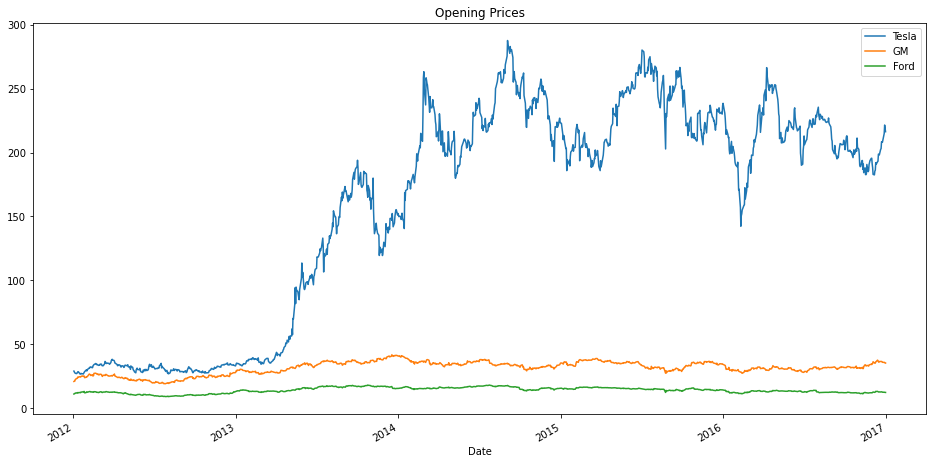

In [7]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.pyplot.legend()

Now the Volume of stock traded each day.

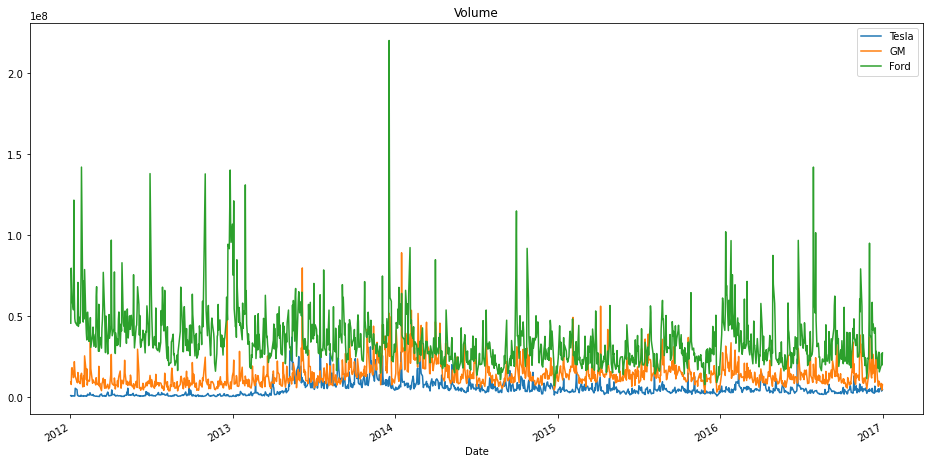

In [8]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.pyplot.legend()

This is where its time to start thinking like an investor.  Looks like Ford had a really big spike somewhere in late 2013. 

Lets try to identify the date of this maximum trading volume



In [9]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

OK so now we have the day.  So if I google Ford and That day look what comes up <link>https://www.youtube.com/watch?v=_iUFI3aBA08</link>

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. 

Unfortunately our current data doesn't have that information of total units of stock present. 

But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

First we create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.

In [10]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']



Now We Plot It

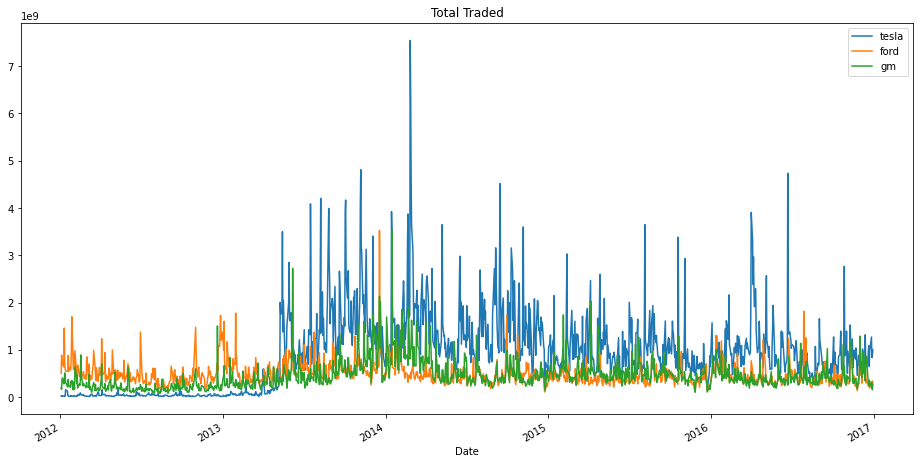

In [11]:
tesla['Total Traded'].plot(label="tesla",figsize=(16,8),title = 'Total Traded')
ford['Total Traded'].plot(label="ford")
gm['Total Traded'].plot(label="gm")
plt.pyplot.legend()

Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened?

In [12]:
tesla['Total Traded'].idxmax() #Check that date and consumer report if you 
# want to know what happened

Timestamp('2014-02-25 00:00:00')

____

Moving Averages - Nothing really stands out to me from this picture so nothing to google here

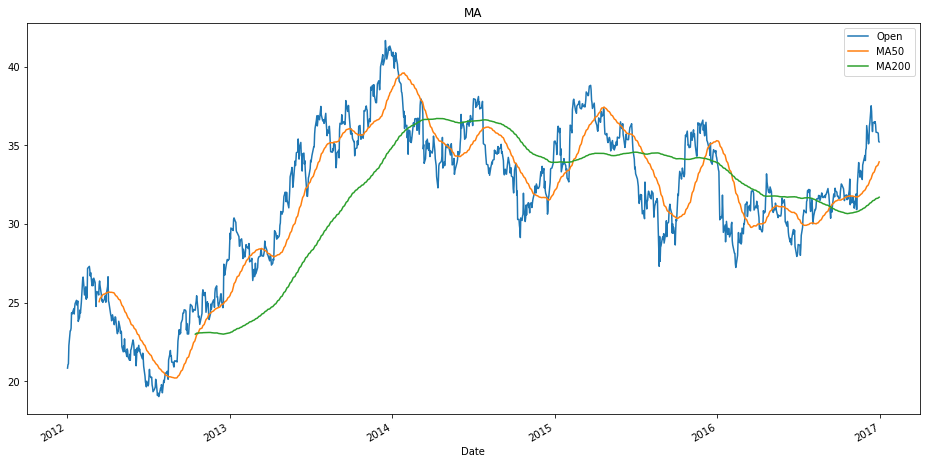

In [13]:
gm['Open'].plot(label='Open')

gm['Open'].rolling(window =50).mean().plot(label='MA50',figsize=(16,8),title = 'MA')
gm['Open'].rolling(window=200).mean().plot(label='MA200')
plt.pyplot.legend()

______

Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot.

In [14]:
import pandas.plotting as pp

In [15]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

#Need to get all the opens in one table for this

In [16]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.830000,11.00
2012-01-04,28.21,21.049999,11.15
2012-01-05,27.76,21.100000,11.33
2012-01-06,27.20,22.260000,11.74
2012-01-09,27.00,23.200001,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E065E55670>,
      dtype=object)

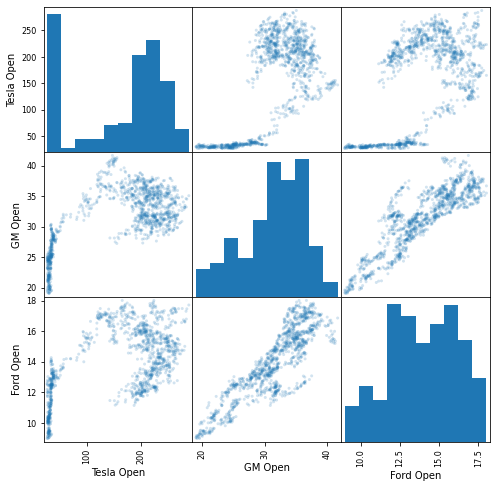

In [17]:
pp.scatter_matrix(car_comp,figsize=(8,8),alpha=0.2)

I'm narrowing the period here so the candlestick chart is meaningful.  I ended up finding a module to help us create our candlestick charts.  It needs to be installed through pip it is called mplfinance

In [18]:
startn = datetime.datetime(2012,1,1)
endn = datetime.datetime(2012,2,1)

ford_narrow = yfin.download('F', start=startn,end=endn)

[*********************100%***********************]  1 of 1 completed


In [19]:
import mplfinance as mpf

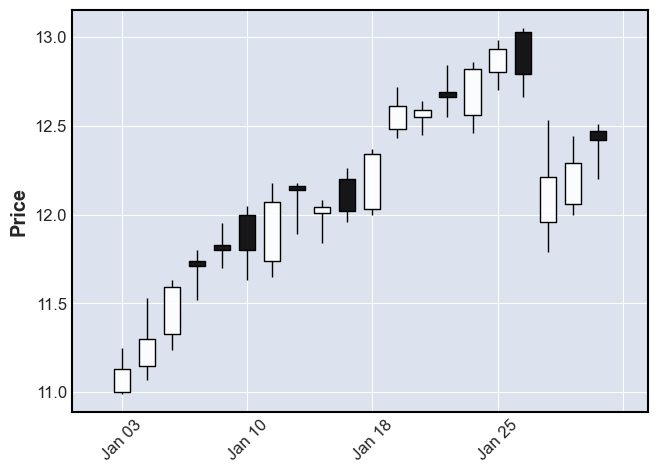

In [20]:
mpf.plot(ford_narrow,type='candle')

In [21]:
ford_narrow.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,7.836860,45709900
2012-01-04,11.15,11.53,11.07,11.30,7.956559,79725200
2012-01-05,11.33,11.63,11.24,11.59,8.160754,67877500
2012-01-06,11.74,11.80,11.52,11.71,8.245250,59840700
2012-01-09,11.83,11.95,11.70,11.80,8.308619,53981500



Now it is time to focus on a few key financial calculations. This is gonna be a lot of markup, because the code is pretty easy due to build in functions.

## Daily Percentage Change
Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. 

We create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method, which is easier.

In [33]:
tesla['Returns']=tesla['Close'].pct_change(1)

In [34]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,Returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [24]:
ford['Returns']=ford['Close'].pct_change(1)

In [25]:
gm['Returns']=gm['Close'].pct_change(1)

These are best viewed as a histogram

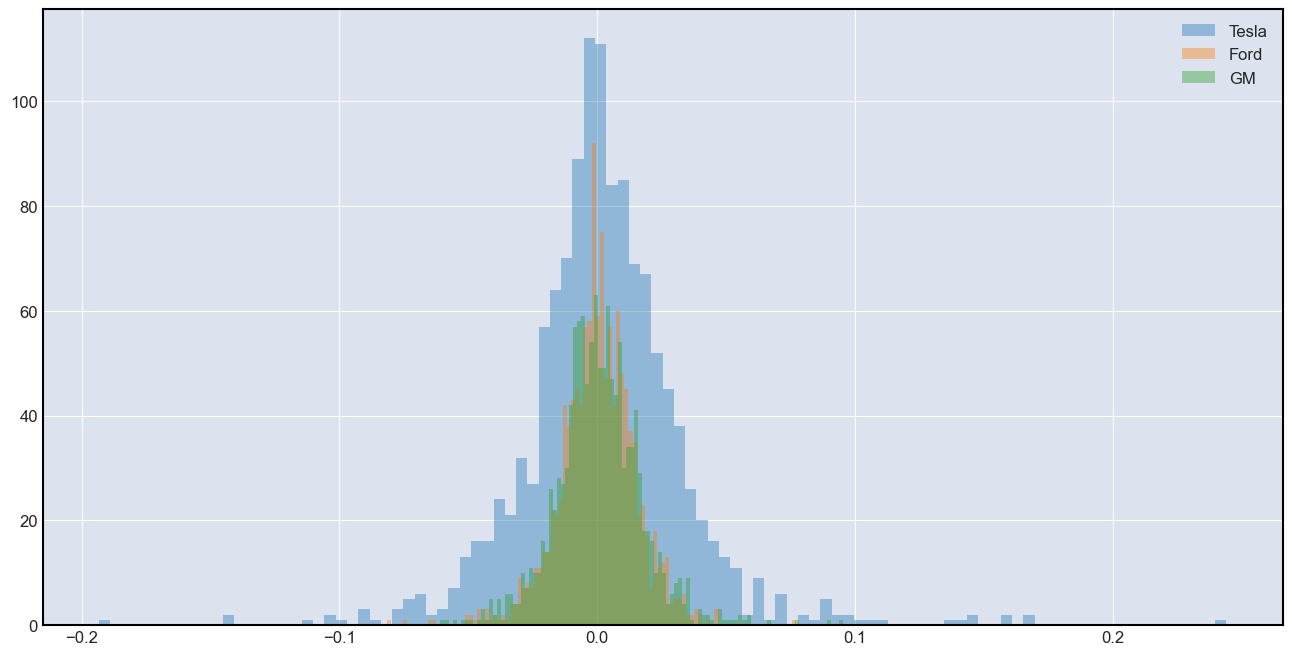

In [26]:
tesla['Returns'].hist(bins=100,label='Tesla',figsize=(16,8),alpha=0.4)
ford['Returns'].hist(bins=100,label='Ford',alpha=0.4)
gm['Returns'].hist(bins=100,label='GM',alpha=0.4)
plt.pyplot.legend()

KDEs are charts that are derived from histograms.  They provide another view.

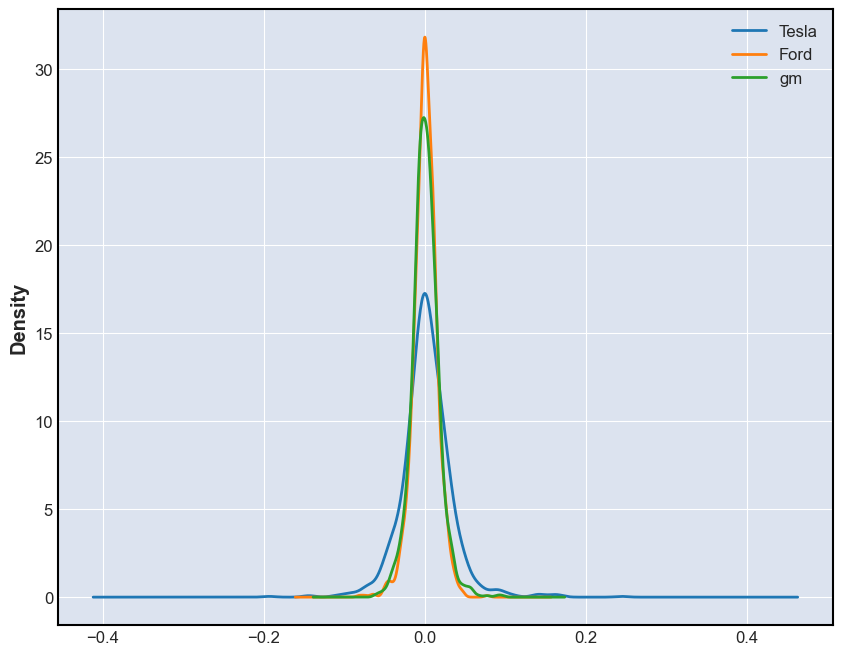

In [27]:
tesla['Returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
ford['Returns'].plot(kind='kde',label='Ford',figsize=(10,8))
gm['Returns'].plot(kind='kde',label='gm',figsize=(10,8))
plt.pyplot.legend()

I personally like stem plots for this

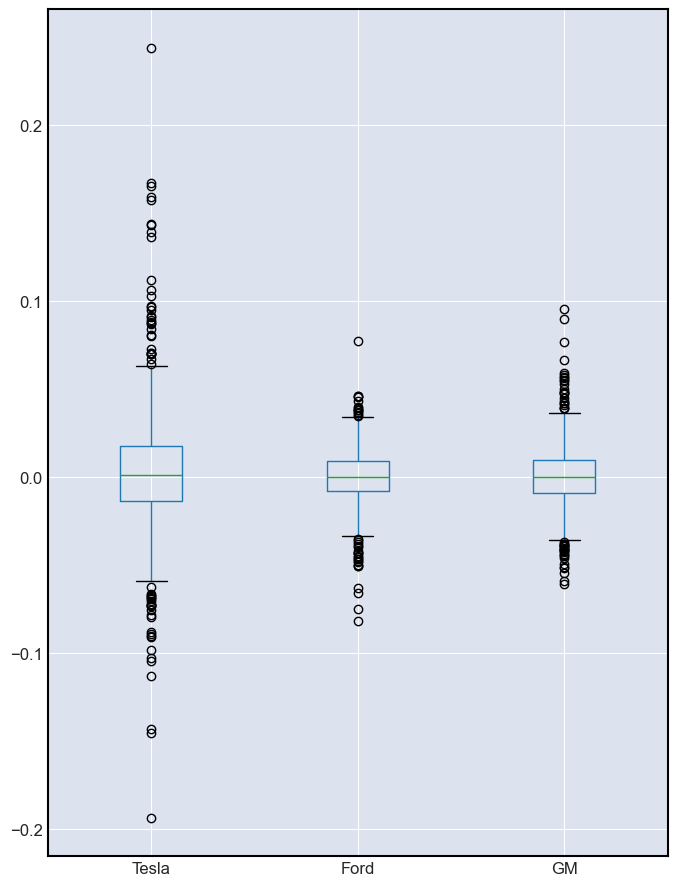

In [28]:
box_df = pd.concat([tesla['Returns'],ford['Returns'],gm['Returns']],axis=1)
box_df.columns = ['Tesla','Ford','GM']
box_df.plot(kind='box',figsize=(8,11))

A scatter matrix here helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?

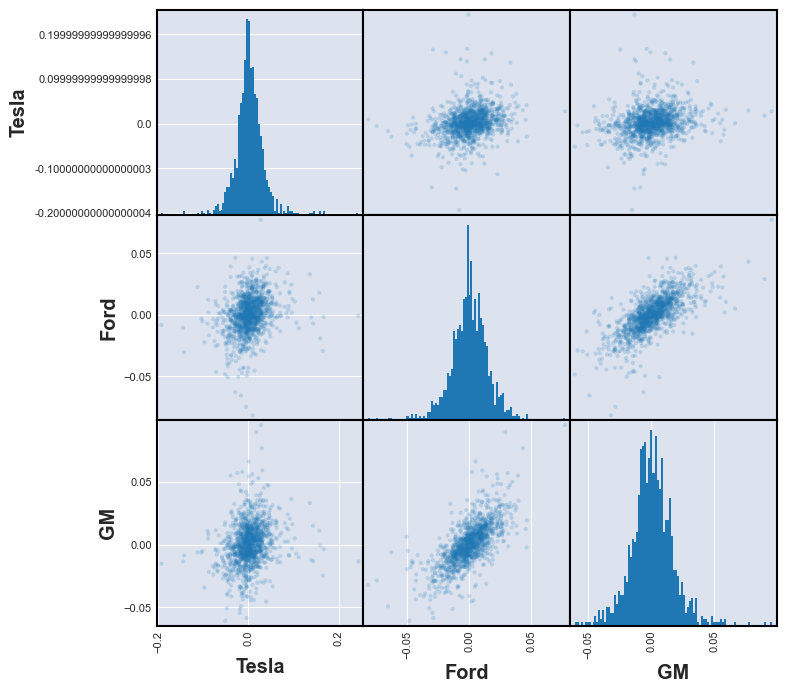

In [29]:
pp.scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to look at this directly

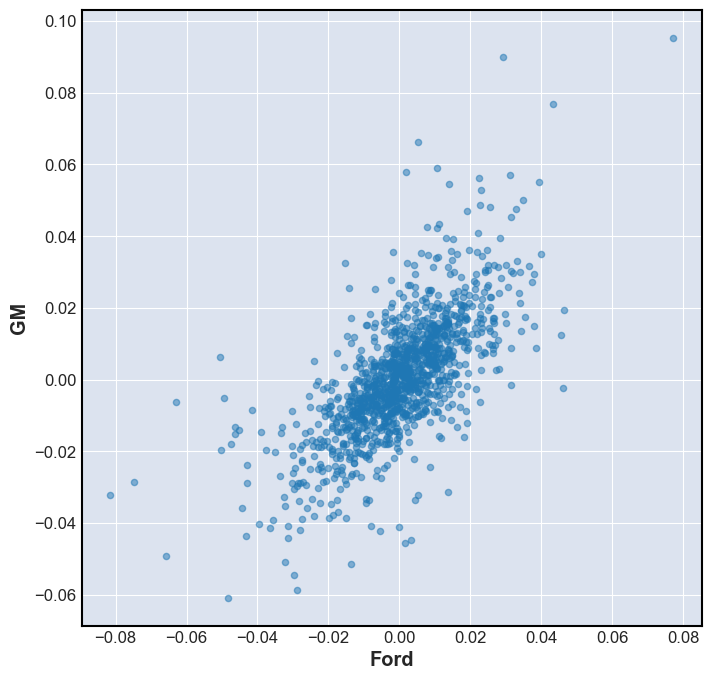

In [30]:
box_df.plot(kind='scatter',x='Ford',y='GM',alpha=0.5,figsize=(8,8))

<p>So what we see here looks a lot like a linear regression, as GM returns increases so does Ford returns.  This is huge, because the most basic form of algorithmic trading work by finding stocks that correlate.

____
## Cumulative Daily Returns
Now we can see which stock was the most wide ranging in daily returns.

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. 

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

So In Code

In [31]:
tesla['Cumulative Return'] = (1 + tesla['Returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['Returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['Returns']).cumprod()

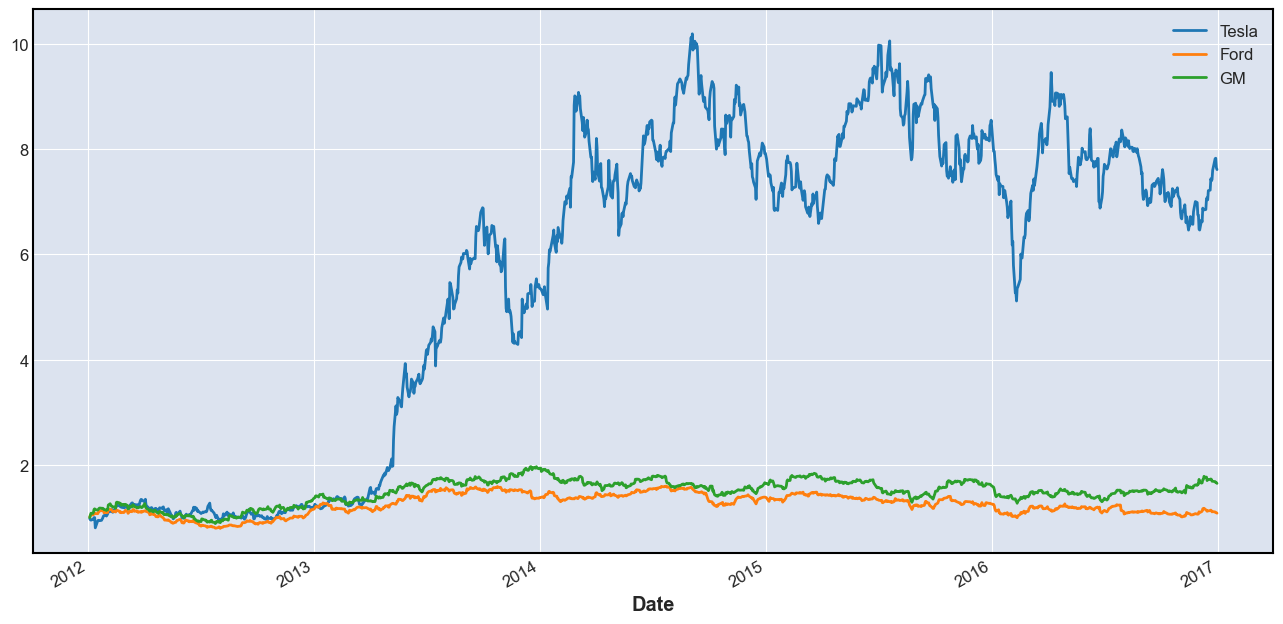

In [32]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.pyplot.legend()

So In Summary, this data is reasonable to work with.  We can visualize as Candlesticks which is an extremely important feature and clearly we can do some level of analysis with what we have